In [4]:
import pandas as pd
from datetime import datetime
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from NowcastingEco import NowcastingEco
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Cleaning and tone analysis

In [3]:
# Local path for the headlines data
df = pd.read_csv('/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/headlines_english_arabic_countries.csv')

/var/folders/jn/gt3868vd039by14gxmgb54b40000gn/T/ipykernel_22039/2683930366.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/headlines_english_arabic_countries.csv')


In [5]:
crash_test = NowcastingEco(df)
cleaned_df, filtered_df = crash_test.clean_data() # Egypt/KSA/UAE

/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/CRP_Egyptian_Economy/NowcastingEco.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.date = self.df.date.apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d%H%M%S'))
/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/CRP_Egyptian_Economy/NowcastingEco.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.tone = self.df.tone.apply(lambda x: self.convert_into_list(x))
/Users/flickr

/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['mean_tone'] = self.df.tone.apply(lambda x: x[0])
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['binary_tone'] = self.df.tone.apply(lambda x: 1 if x[1] > x[2] else 0)


The correlation between the average tones and the Exports from 2015 to 2022 is: 0.7654664546681031.
The correlation between the positive article ratio and the Exports from 2015 to 2022 is: 0.563553206174574.


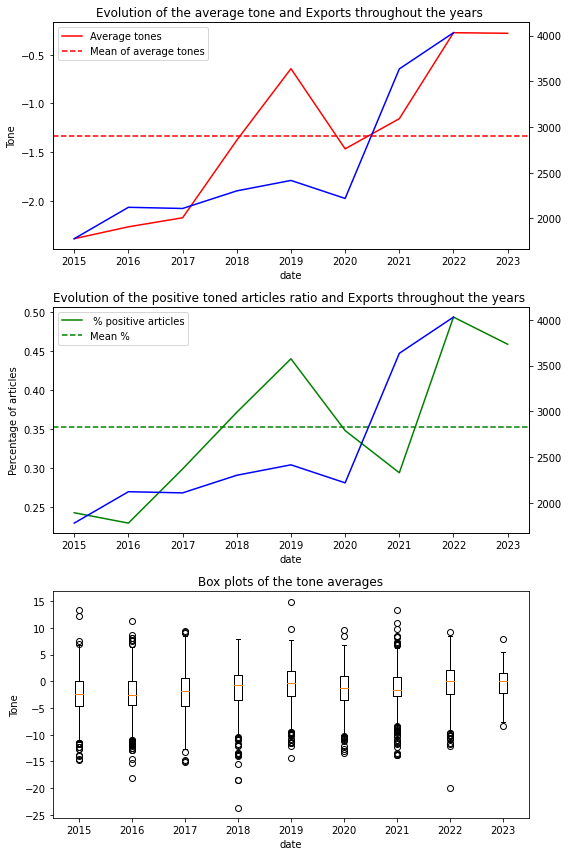

Number of articles per year for the filtered country and theme:  date
2015    2175
2016    2924
2017    1709
2018    1318
2019     949
2020     580
2021    1020
2022     836
2023     159
Name: cleaned_themes, dtype: int64


In [4]:
crash_test.tone_analysis(path='/Users/amaury/Documents/!DSBA/CRP/Bloomberg_Data_Egypt_datefixed.xlsx',indicator=True) 

### More advanced modelling with linear regression

Since direct correlations was hard to establish between tone and indicators, we are trying to model indicators with multiples tone time series as inputs through Linear regression (allows to keep explainability and interpretability for the client).

In [7]:
# More convenient to reload data with the new tone (from NLP_models.ipynb) since the headlines data are too big for GitHub
df = pd.read_csv('/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/tone prediction/uae_tone_pred.csv')
crash_test = NowcastingEco(df)

/var/folders/jn/gt3868vd039by14gxmgb54b40000gn/T/ipykernel_22039/2382780965.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/tone prediction/uae_tone_pred.csv')


In [8]:
tone, ind = crash_test.compute_tone_time_series(df,'/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/Bloomberg/Bloomberg_Data_UAE.xlsx')

/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/CRP_Egyptian_Economy/NowcastingEco.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['binary_tone'] = df3.tone_prediction.apply(lambda x: 1 if x == "negative" else 0)
/Users/flickr-xc/Library/Mobile Documents/com~apple~CloudDocs/DSBA Courses/CRP/CRP_Egyptian_Economy/NowcastingEco.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['binary_tone'] = df3.tone_prediction.apply(lambda x: 1 if x == "negative" else 0)
/Use

In [ ]:
# Checking stationarity
# ADF Test to assess the stationarity of the indicator time series
adf_stat, p_value, _, _, _, _ = adfuller(ind.Value)
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)
print("Is the time series stationary (ADF)?", p_value < 0.05)
print(ind.Value)

In [9]:
## Linear Regression

# Concatenate the selected tone series into a single DataFrame
concatenated_series = pd.concat(tone[4],tone[5],tone[6],tone[8],tone[9], axis=1)
# Merge the GDP indicator DataFrame with the concatenated series DataFrame
merged_data = pd.merge(ind, concatenated_series, left_on='Date',right_on='date')  # or 'year'
# to check if each filtered tone time series doesn't contain null values
print(merged_data.isnull().sum())
print(merged_data)


,Value,year_month,year,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone,binary_tone
0,0.062926,2015-03,2015,0.945455,0.722397,0.805063,0.813665,0.853659,0.802632,0.870968,0.839161,0.800000,0.803279,0.935484,0.830357,0.940476,0.821622
1,0.052155,2015-06,2015,0.901538,0.773734,0.798848,0.847666,0.839357,0.808564,0.892157,0.877778,0.740838,0.816794,0.862069,0.767619,0.868421,0.883562
2,0.042875,2015-09,2015,0.833846,0.725034,0.797742,0.814634,0.841509,0.804938,0.915663,0.811989,0.776801,0.841216,0.924242,0.777969,0.841328,0.772277
3,0.046656,2015-12,2015,0.908235,0.772787,0.832835,0.875566,0.904908,0.886831,0.964286,0.875598,0.847826,0.867596,0.870968,0.858631,0.865854,0.819930
4,0.028627,2016-03,2016,0.889590,0.733711,0.787764,0.868557,0.878049,0.819302,0.899160,0.827815,0.748503,0.847826,0.855263,0.763158,0.808411,0.790378
5,0.027076,2016-06,2016,0.879149,0.761337,0.798733,0.820565,0.855422,0.800681,0.911765,0.862705,0.758278,0.839142,0.879310,0.787515,0.810526,0.769355
6,0.028357,2016-09,2016,0.847786,0.755177,0.753203,0.887019,0.830189,0.821429,0.850000,0.842572,0.692211,0.826087,0.784615,0.729907,0.790698,0.710042
7,0.038611,2016-12,2016,0.916116,0.804077,0.846177,0.887755,0.917293,0.899340,0.940789,0.887015,0.855263,0.909548,0.923077,0.863248,0.898678,0.859599
8,0.034041,2017-03,2017,0.891051,0.754404,0.801887,0.846278,0.897872,0.835616,0.858537,0.851906,0.793750,0.876356,0.934066,0.797790,0.823344,0.778689
9,0.022175,2017-06,2017,0.854359,0.760000,0.791442,0.826446,0.875445,0.828442,0.892857,0.811671,0.804401,0.843206,0.933333,0.789303,0.871111,0.767204


Mean Squared Error: 0.04359660680996663
R-squared Score: -35.62273602650947


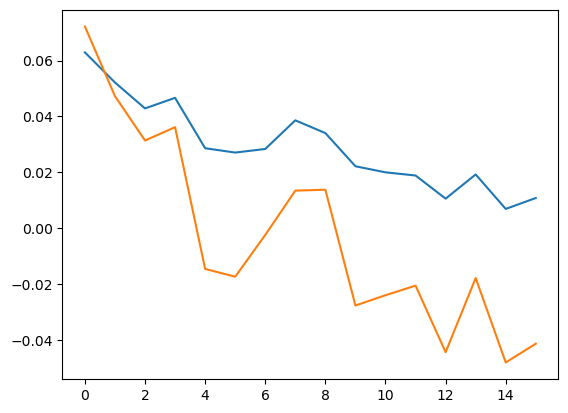

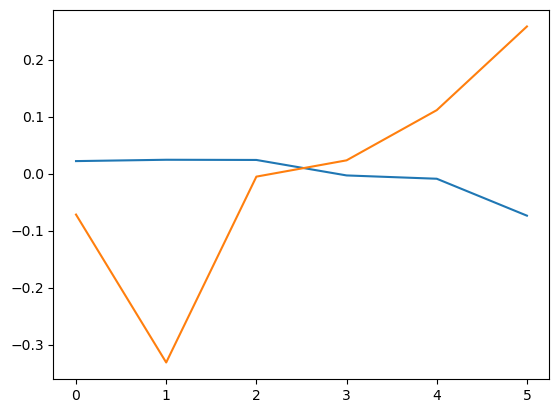

In [10]:
# Split the data based on time
train_data = merged_data[(merged_data['year'] >= 2015) & (merged_data['year'] <= 2018)]
test_data = merged_data[(merged_data['year'] >= 2019) & (merged_data['year'] <= 2020)]

X_train = train_data.iloc[:, 3:].values
y_train = train_data['Value'].values.reshape(-1, 1)
X_test = test_data.iloc[:, 3:].values
y_test = test_data['Value'].values.reshape(-1, 1)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the input features
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

# Create an instance of the linear regression model
model = LinearRegression()  # / Lasso() / Ridge()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the scaled testing data
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to obtain the original scale
predictions = scaler.inverse_transform(predictions_scaled)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, predictions)
print("R-squared Score:", r2)

# Plotting predictions on the training data
train_predictions_scaled = model.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)


plt.plot(y_train)
plt.plot(train_predictions)
plt.show()

test_data.year_month_str = pd.to_datetime([str(ym) for ym in test_data.year_month])

plt.figure(figsize=(15,8))
plt.plot(test_data.year_month_str,y_test, label='truth')
plt.plot(test_data.year_month_str,predictions, label='prediction')
plt.legend()
plt.show()
